In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
num_vectors = 1000
num_clusters = 4
num_steps = 100
x_values = []
y_values = []
vector_values = []

In [5]:
for i in range(num_vectors):
    if np.random.random() > 0.5:
        x_values.append(np.random.normal(0.4, 0.7))
        y_values.append(np.random.normal(0.2, 0.8))
    else:
        x_values.append(np.random.normal(0.6, 0.4))
        y_values.append(np.random.normal(0.8, 0.5))

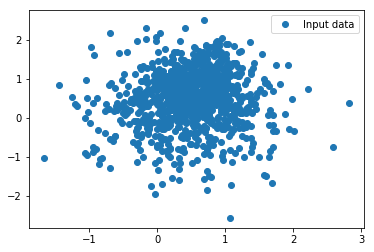

In [10]:
vector_values = list(zip(x_values, y_values))
vectors = tf.constant(vector_values)
plt.plot(x_values, y_values, 'o', label = 'Input data')
plt.legend()

In [13]:
n_samples = tf.shape(vector_values)[0]
random_indices = tf.random_shuffle(tf.range(0, n_samples))

In [15]:
begin = [0,]
size = [num_clusters,]
size[0] = num_clusters
centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vector_values, centroid_indices))

In [16]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

In [19]:
vectors_subtraction = tf.subtract(expanded_vectors, expanded_centroids)

In [21]:
euclidean_distance = tf.reduce_sum(tf.square(vectors_subtraction), 2)
assignments = tf.to_int32(tf.argmin(euclidean_distance, 0))

In [25]:
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)

[<tf.Tensor 'DynamicPartition_2:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'DynamicPartition_2:1' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'DynamicPartition_2:2' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'DynamicPartition_2:3' shape=(?, 2) dtype=float32>]

In [31]:
update_centroids = tf.concat([tf.expand_dims(tf.reduce_mean(partition, 0), 0) for partition in partitions], 0)

In [34]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [37]:
def display_partition(x_values, y_values, assignment_values):
    labels = []
    colors = ['red', 'blue', 'green', 'yellow']
    for i in range(len(assignment_values)):
        labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame(dict(x = x_values, y = y_values, color = labels))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c = df['color'])
    plt.show()

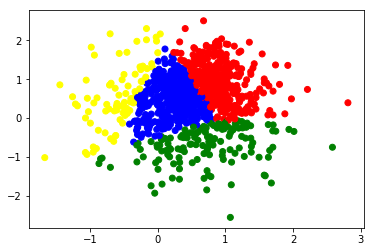

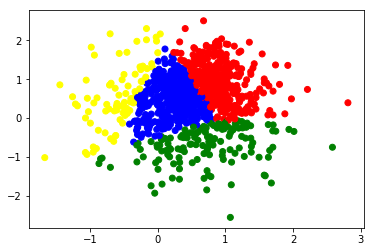

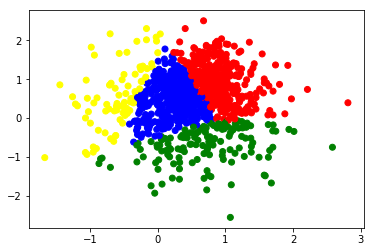

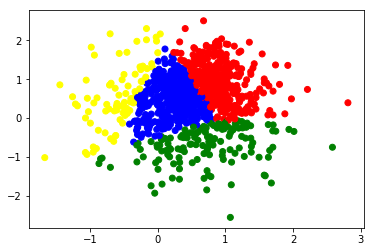

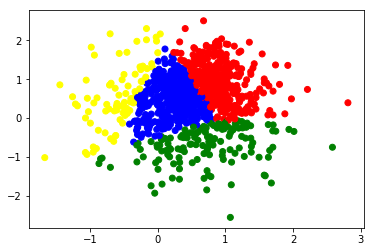

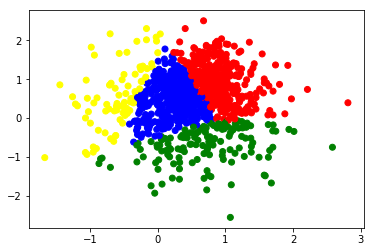

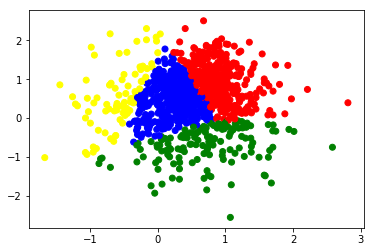

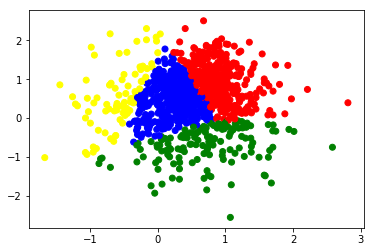

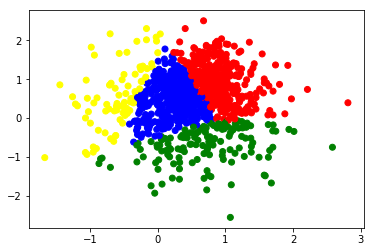

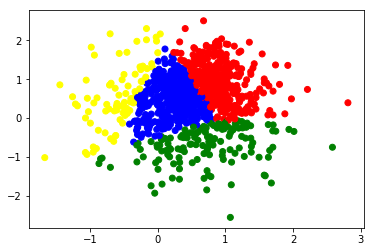

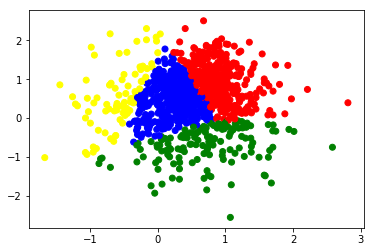

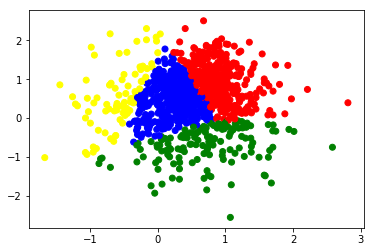

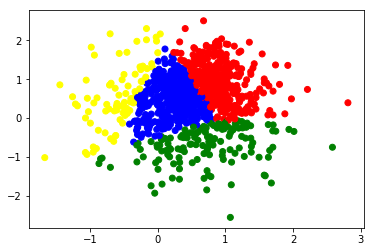

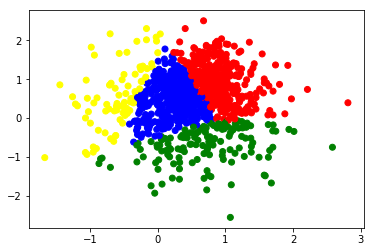

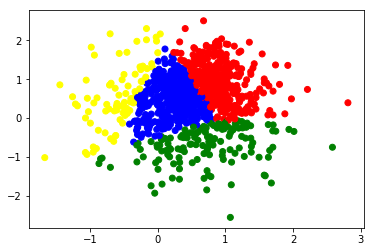

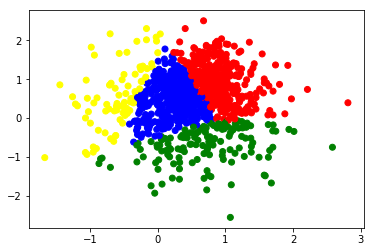

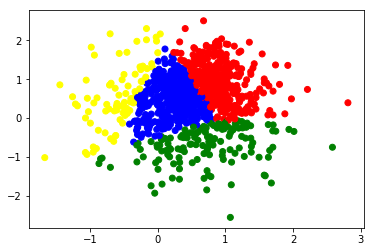

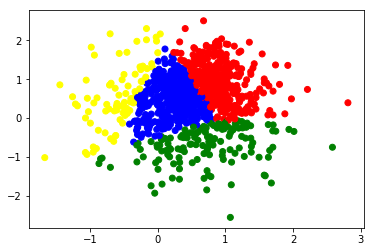

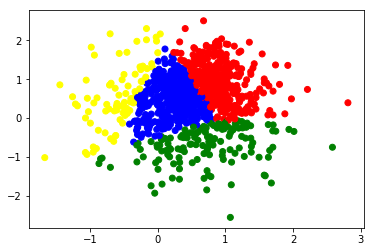

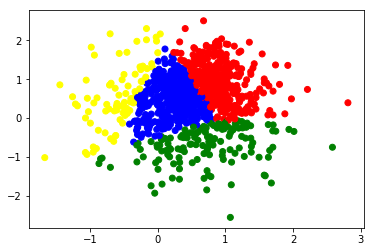

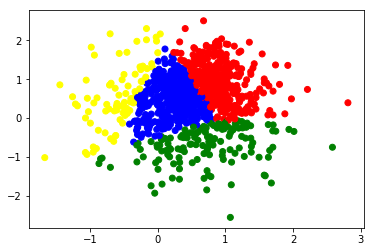

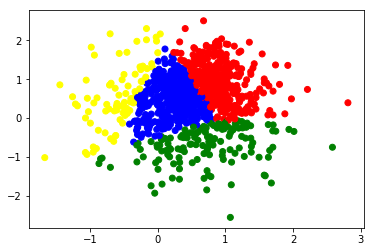

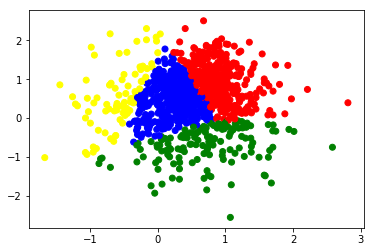

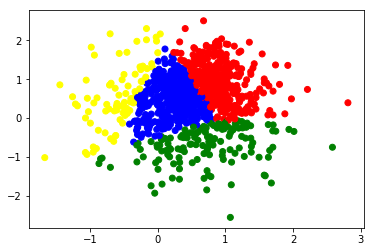

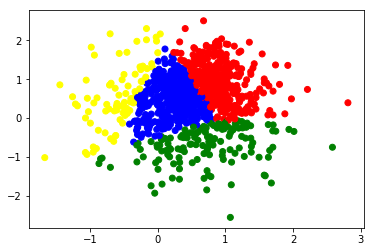

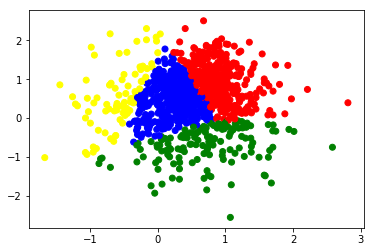

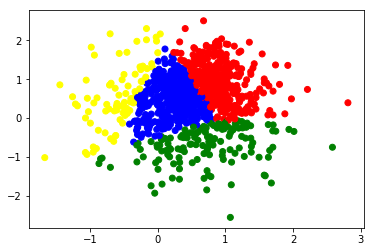

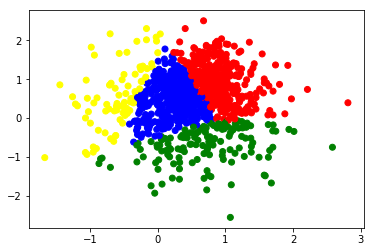

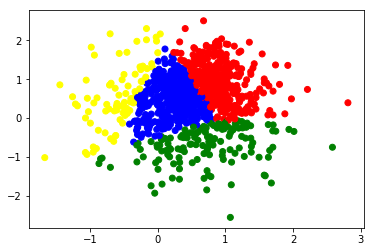

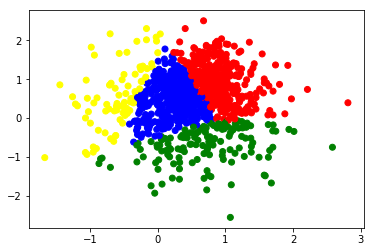

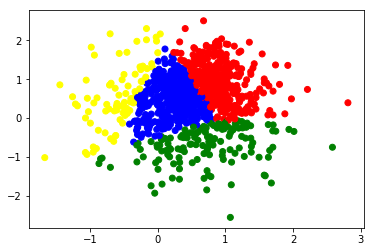

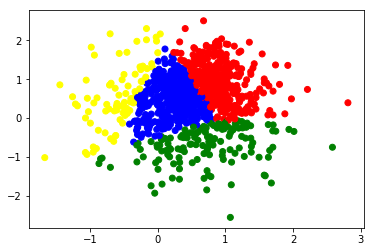

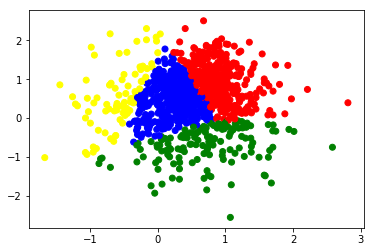

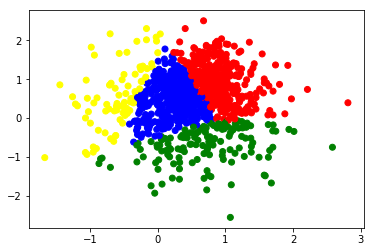

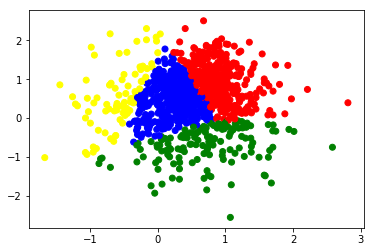

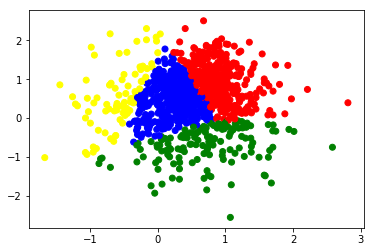

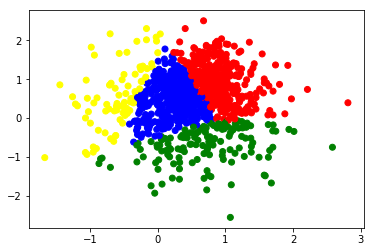

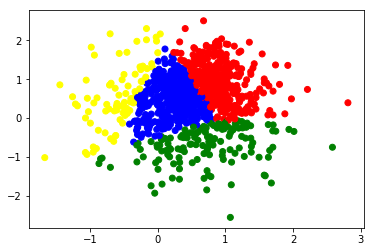

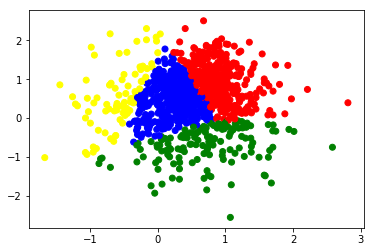

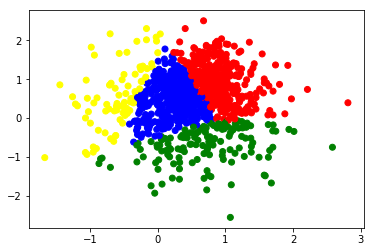

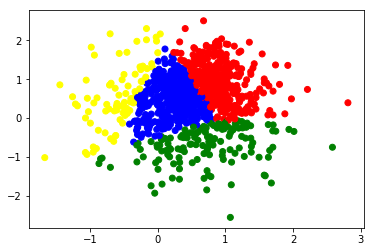

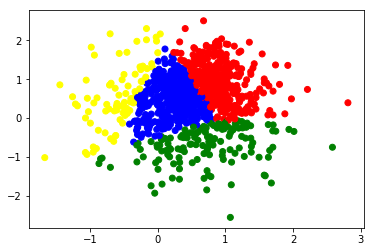

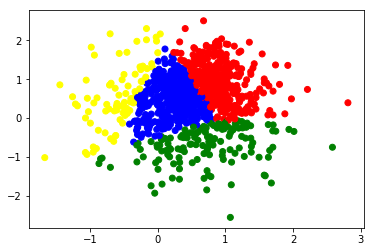

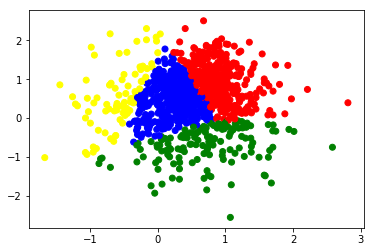

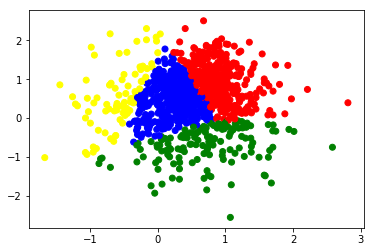

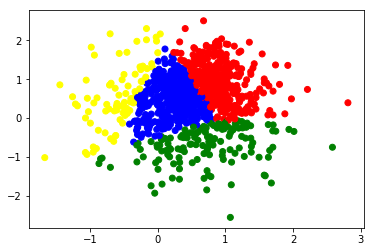

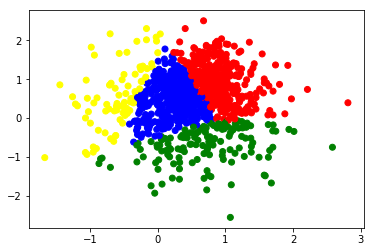

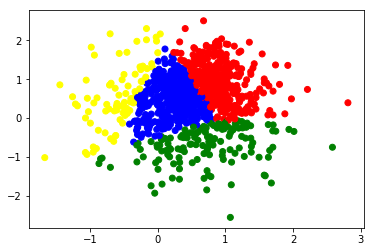

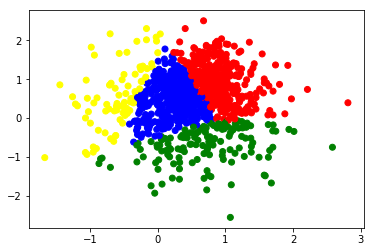

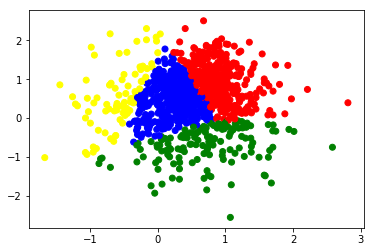

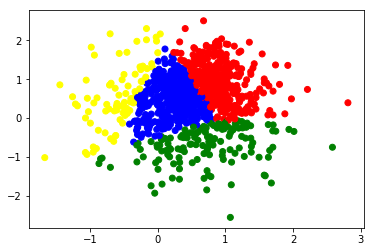

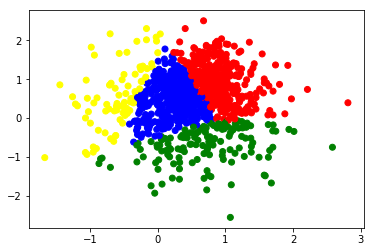

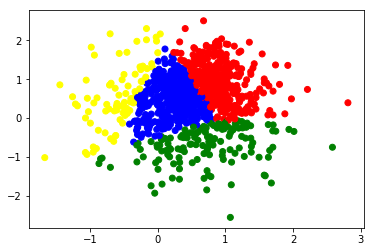

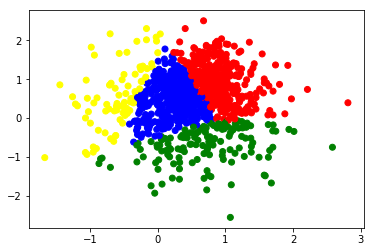

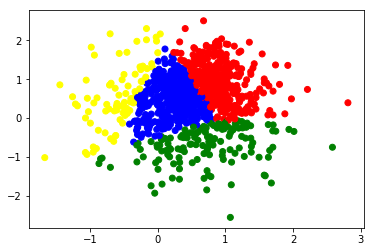

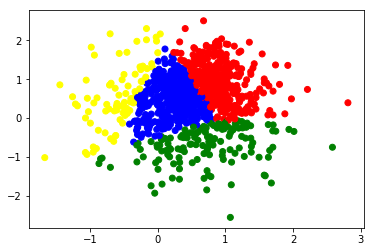

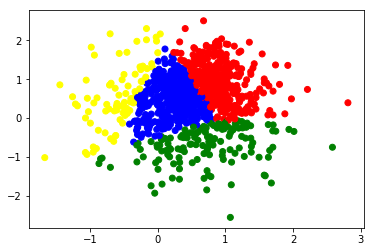

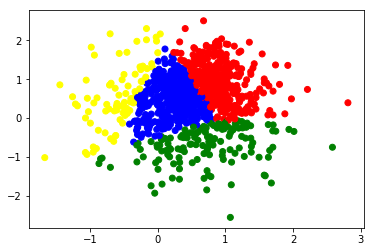

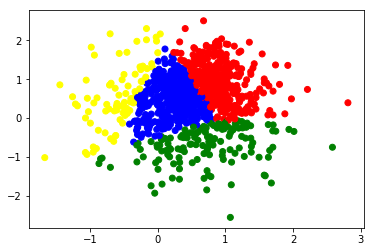

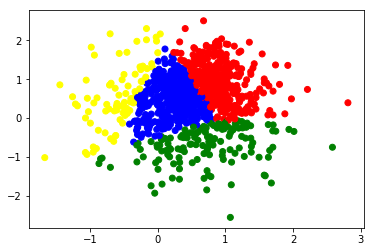

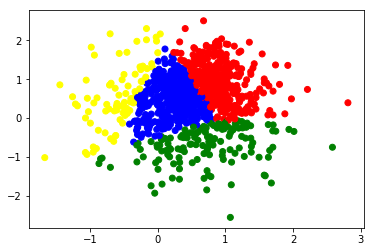

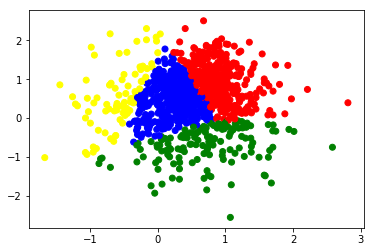

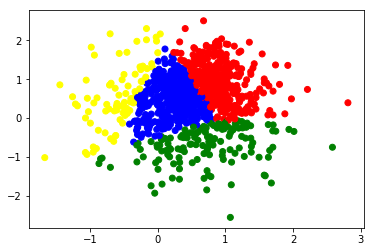

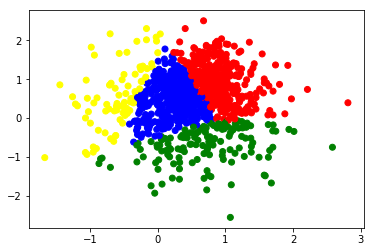

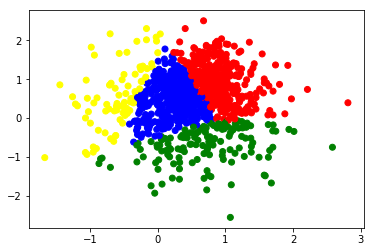

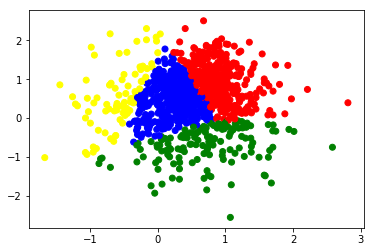

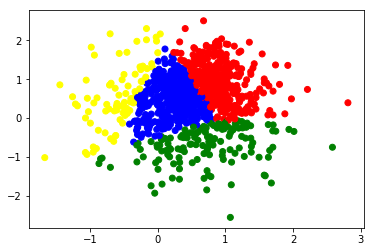

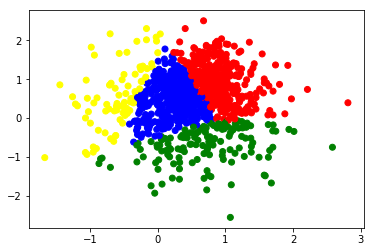

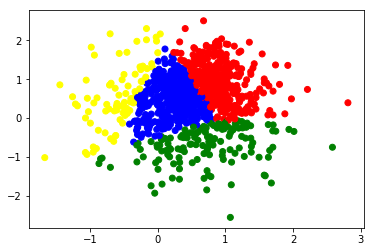

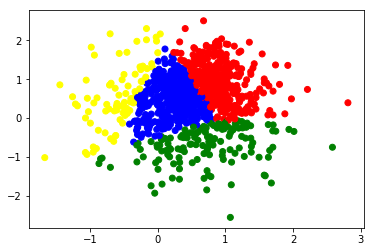

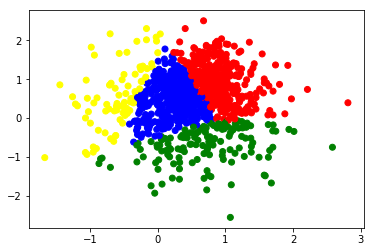

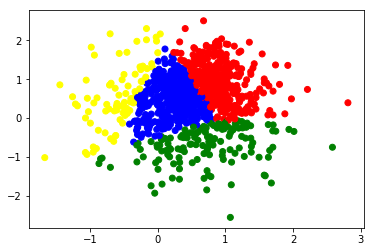

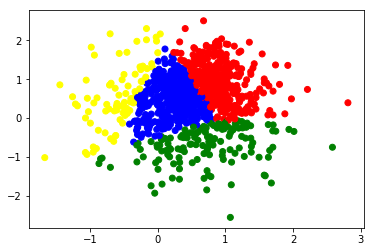

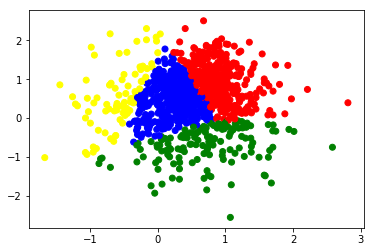

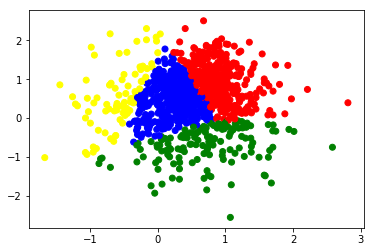

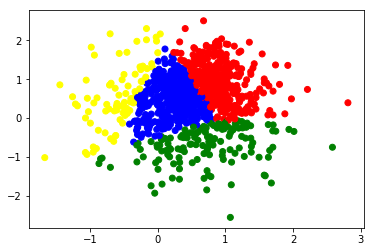

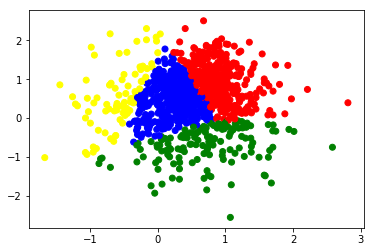

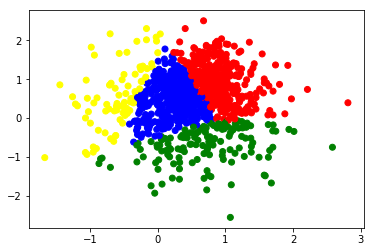

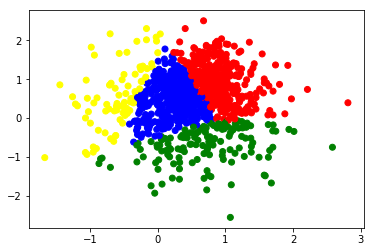

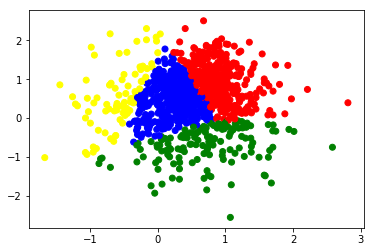

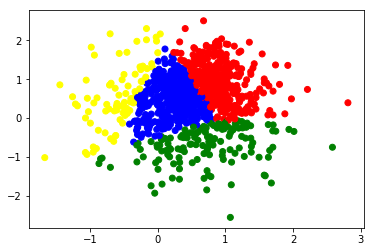

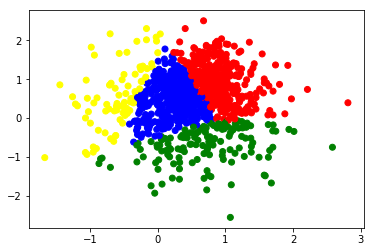

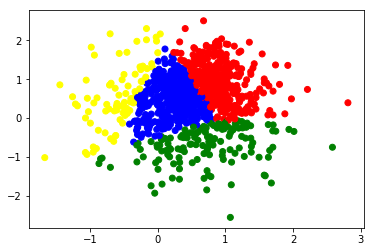

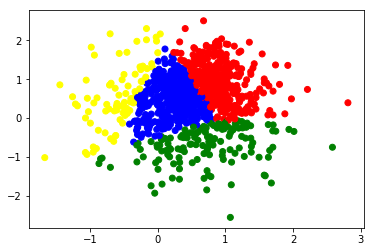

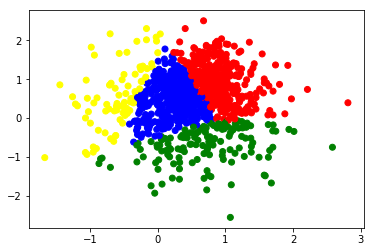

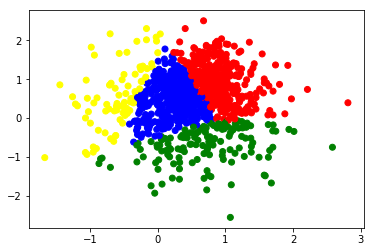

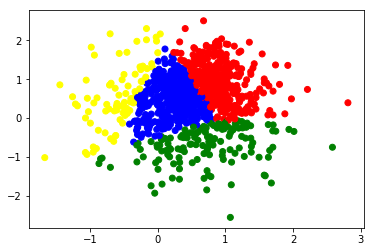

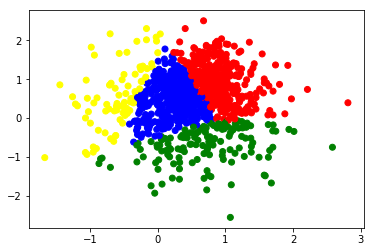

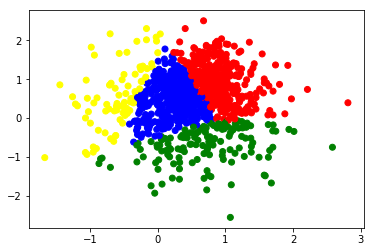

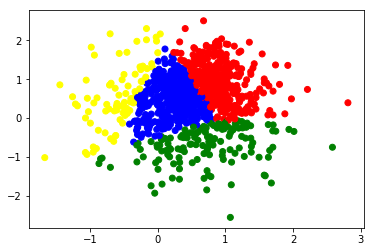

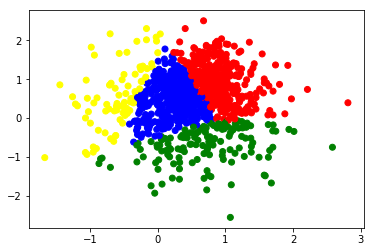

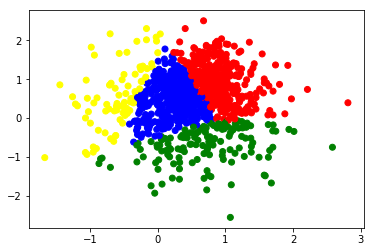

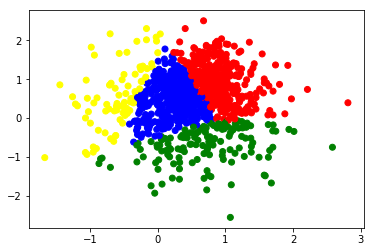

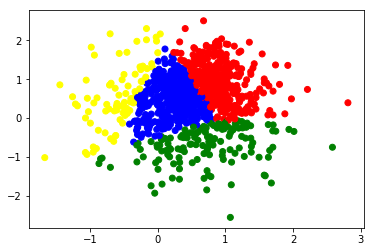

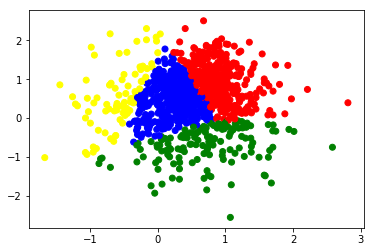

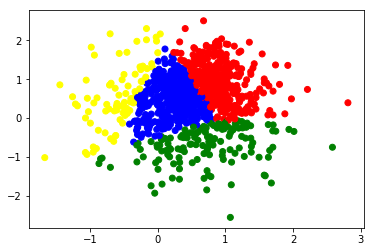

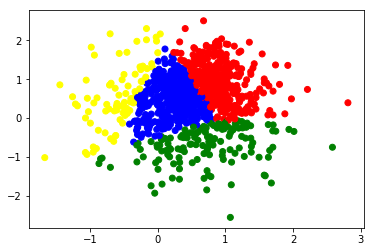

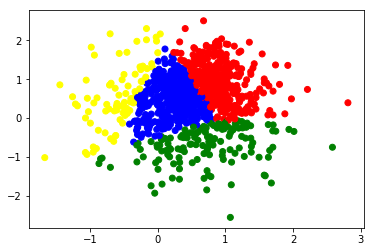

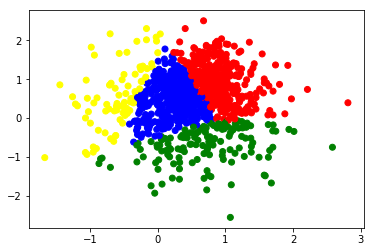

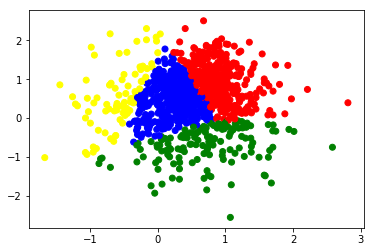

In [38]:
for step in range(num_steps):
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])
    display_partition(x_values, y_values, assignment_values)